# Task 02 :- Predict the optimum number of clusters and represent it visually. 


## **Author: Saurabh Prashant Nagvekar**


#### source of data : "Iris"  https://bit.ly/3kXTdox


### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

# import train_test_split
from sklearn.model_selection import train_test_split

# plotting parameters
plt.rcParams["figure.figsize"] = [15,8]

### Data Exploration

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.6,3.4,1.4,0.3,setosa
89,5.5,2.5,4.0,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
147,6.5,3.0,5.2,2.0,virginica


In [4]:
df.shape

(150, 5)

### Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Checking for any Null values

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

### Visualization

### Checking the Distribution of all the numerical features

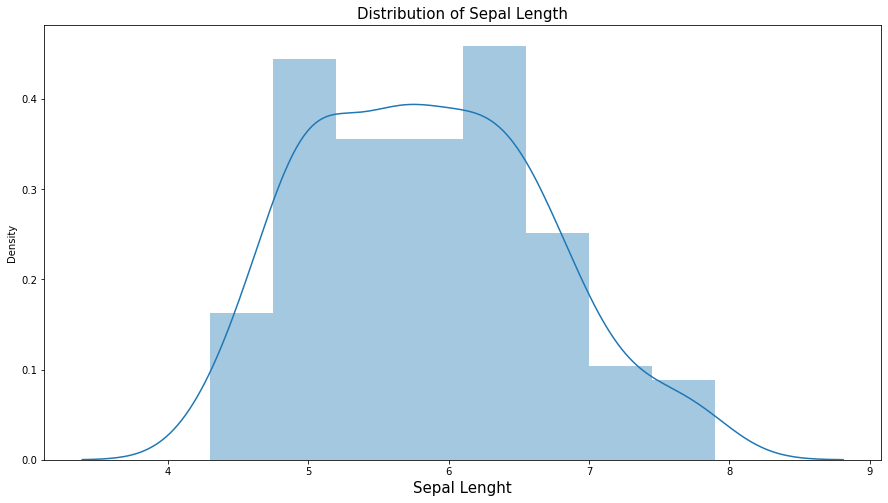

In [9]:
sns.distplot(df["sepal_length"])
plt.title("Distribution of Sepal Length",fontsize=15)
plt.xlabel("Sepal Lenght",fontsize=15)
plt.show()

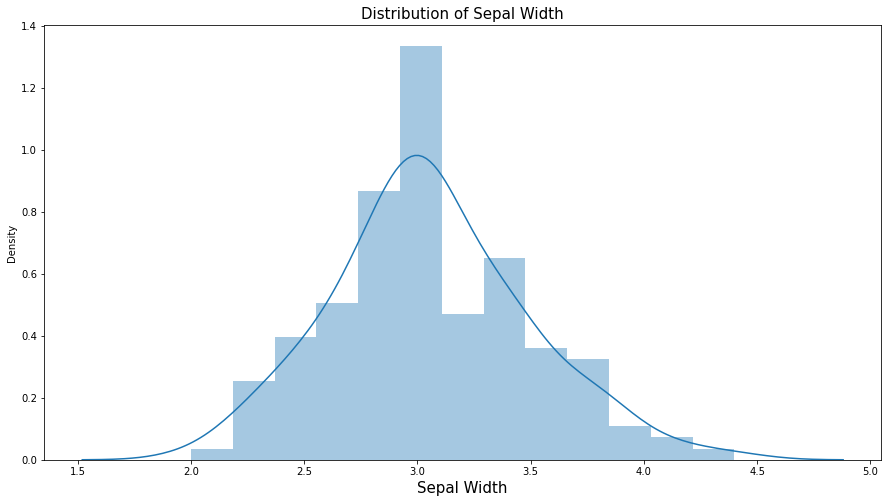

In [10]:
sns.distplot(df["sepal_width"])
plt.title("Distribution of Sepal Width",fontsize=15)
plt.xlabel("Sepal Width",fontsize=15)
plt.show()

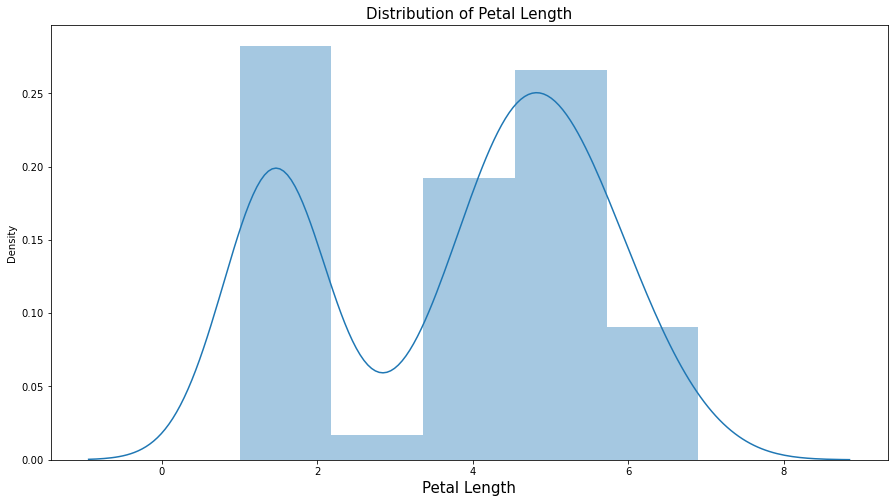

In [11]:
sns.distplot(df["petal_length"])
plt.title("Distribution of Petal Length",fontsize=15)
plt.xlabel("Petal Length",fontsize=15)
plt.show()

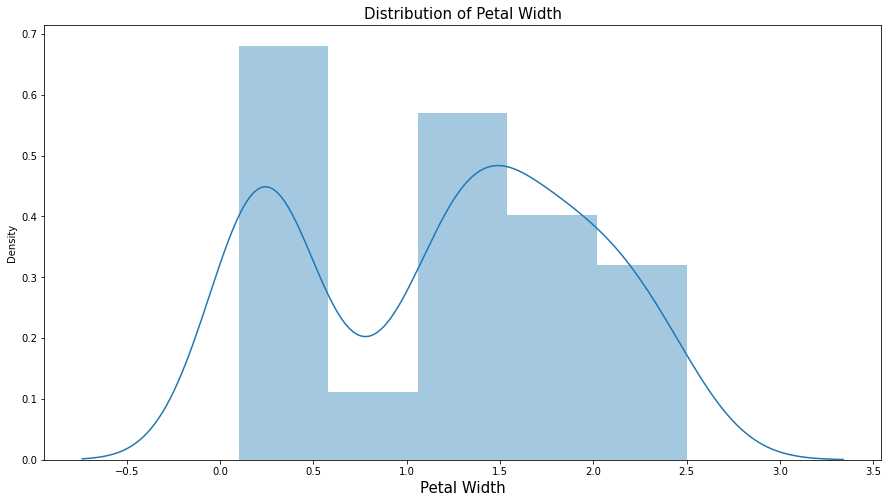

In [12]:
sns.distplot(df["petal_width"])
plt.title("Distribution of Petal Width",fontsize=15)
plt.xlabel("Petal Width",fontsize=15)
plt.show()

#### Inference : From above plots, we can conclude that features are normally distributed

In [13]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

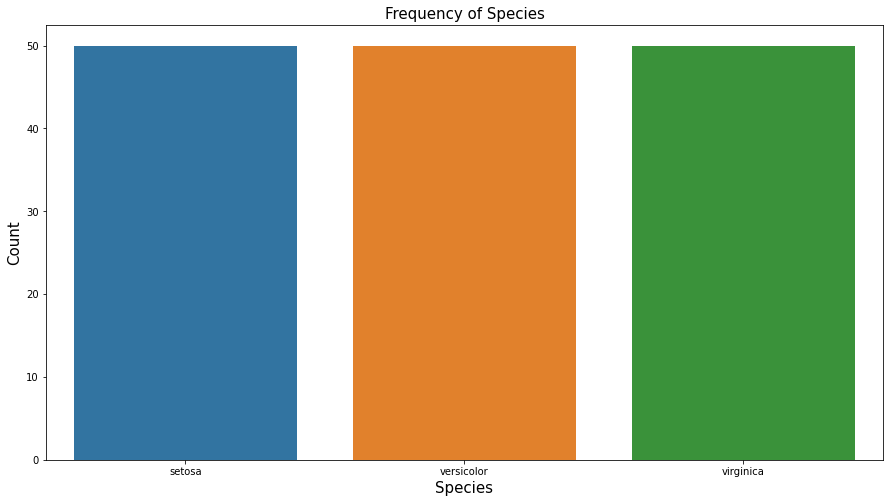

In [14]:
sns.countplot(df["species"])
plt.title("Frequency of Species",fontsize=15)
plt.xlabel("Species",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Inference: From the plot, we can observe that Frequency of all the species are equal.

### Applying KMeans Cluster on the data, to find optimal no.of clusters

In [15]:
x = df.iloc[:,:-1].values

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcv = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(x)
    wcv.append(kmeans.inertia_)

### Plotting the Optimal number of cluster by KMeans

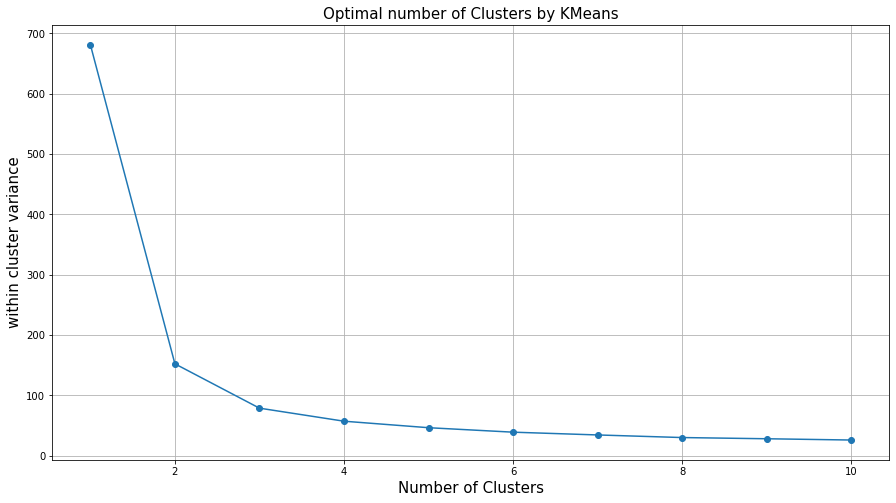

In [18]:
plt.plot(range(1,11),wcv,marker='o')
plt.title("Optimal number of Clusters by KMeans",fontsize=15)
plt.xlabel("Number of Clusters",fontsize=15)
plt.ylabel("within cluster variance",fontsize=15)
plt.grid()
plt.show()

#### Inference: From above plot, we can observe that optimal number of clusters can be 2 or 3. We are selecting 3 has optimal number of clusters.

### Predicting with Optimal no.of cluster

In [19]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visualizing the Clusters

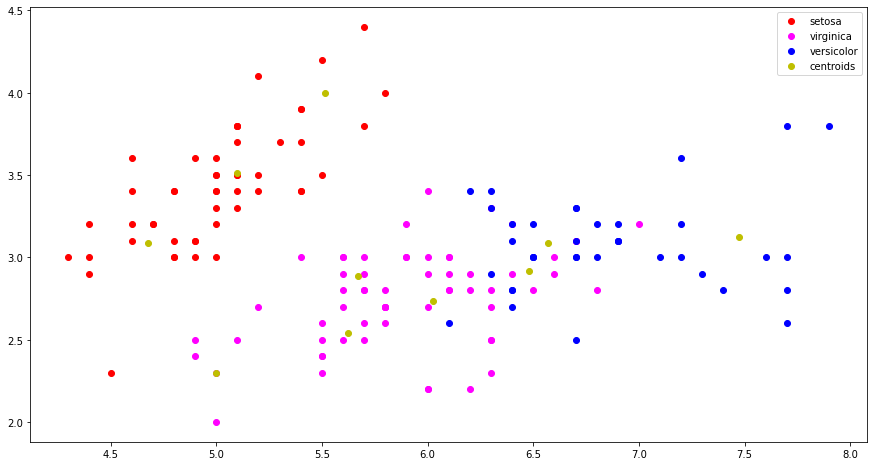

In [20]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'r', label = "setosa")
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'magentA', label = "virginica")
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'b', label = "versicolor")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'y', label = "centroids")
plt.legend()
plt.show()